In [2]:
import importlib
import datetime as dt

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from scipy import stats

import plotly.graph_objects as ptly
import plotly.express as px

import waldluft as wl

plt.style.use("janjo-v0-0.mplstyle")

In [40]:
importlib.reload(wl)

<module 'waldluft' from '/Users/Janjo/Documents/MEINE DOKUMENTE/Projects/kaltluftstrom/waldluft.py'>

In [37]:
SENSOR_LABELS = {
    "W1": "W1: Schneise 1",
    "W6": "W6: Ref. Waldrand 1",
    "W7": "W7: Ref. Waldrand 2",
    "W8": "W8: Ref. Quartier",
    "W9": "W9: Ref. Wald",
    "S8": "S8: Ref. Quartier",
    "S9": "S9: Ref. Wald",
}

In [41]:
inst = wl.Timed("raw_data/220905", encoding="iso8859-1", sensor_labels=SENSOR_LABELS)

Successfully imported the following sensor data:
    WTDL:
        W6
        W7
        W5
        W4
        W1
        W3
        W2
        W9
        W8
    SHT:
        S1  98:2B
        S3  A5:6D
        S2  B1:5B
        S7  79:D0
        S9  CD:A2
        S8  E1:E1


In [ ]:
inst.plot_temp_time(file_export=True, file_export_path="playground")

In [ ]:
dtd = wl.Dated(inst.timeseries)

In [55]:
dtd.assign_bins(("W6", "W7", "W8", "W9"))

In [56]:
dtd.dateseries

sensor        W6               W7                    S1               S3  \
key         20-1             20-1                  20-1             20-1   
unit       count          T count          T          T count          T   
2022-07-05   0.0        NaN   0.0        NaN        NaN   NaN        NaN   
2022-07-06  21.0  20.294905  20.0  20.525300        NaN   NaN        NaN   
2022-07-07  21.0  19.181762  20.0  19.790800        NaN   NaN        NaN   
2022-07-08  21.0  19.476476  20.0  19.972100        NaN   NaN        NaN   
2022-07-09  21.0  21.116190  20.0  21.740950        NaN   NaN        NaN   
...          ...        ...   ...        ...        ...   ...        ...   
2022-09-01  21.0  17.744381  20.0  17.740900  16.833667   6.0  16.803667   
2022-09-02  21.0  16.664000  20.0  17.225250  16.275000   6.0  16.324000   
2022-09-03  21.0  16.527095  20.0  17.128300  16.177667   6.0  16.231167   
2022-09-04  21.0  20.488381  20.0  21.094000  19.479333   6.0  19.719500   
2022-09-05  16.0  21.011938  16.0  21.160375        NaN   0.0        NaN   

sensor              W5             ...         S9               S8        \
key               20-1             ...       27-1             27-1         
unit       count count          T  ...          T count          T count   
2022-07-05   NaN   0.0        NaN  ...        NaN   NaN        NaN   NaN   
2022-07-06   NaN  20.0  19.612700  ...        NaN   NaN        NaN   NaN   
2022-07-07   NaN  20.0  18.975300  ...        NaN   NaN        NaN   NaN   
2022-07-08   NaN  20.0  18.500250  ...        NaN   NaN        NaN   NaN   
2022-07-09   NaN  20.0  20.647100  ...        NaN   NaN        NaN   NaN   
...          ...   ...        ...  ...        ...   ...        ...   ...   
2022-09-01   6.0  20.0  16.390800  ...  14.328333   6.0  13.880667   6.0   
2022-09-02   6.0  20.0  16.356500  ...  14.852000   6.0  15.032667   6.0   
2022-09-03   6.0  20.0  16.169000  ...  14.786167   6.0  13.837167   6.0   
2022-09-04   6.0  20.0  19.309600  ...  16.717000   6.0  15.079833   6.0   
2022-09-05   0.0  15.0  21.075267  ...        NaN   0.0        NaN   0.0   

sensor             W9              W8          binning         
key              27-1            27-1          default         
unit                T count         T count      ref_T bin_nr  
2022-07-05  10.162700  20.0  10.16895  20.0        NaN    NaN  
2022-07-06  14.994000  20.0  15.30645  20.0  20.566901    1.0  
2022-07-07  14.403400  20.0  14.26895  20.0  19.173753    0.0  
2022-07-08  14.928400  20.0  15.35645  20.0  19.764619    1.0  
2022-07-09  16.475150  20.0  16.07835  20.0  21.325335    1.0  
...               ...   ...       ...   ...        ...    ...  
2022-09-01  14.196667  21.0  14.07205  20.0  17.655093    0.0  
2022-09-02  14.625286  21.0  15.07520  20.0  17.045995    0.0  
2022-09-03  14.750286  21.0  14.00025  20.0  16.814324    0.0  
2022-09-04  16.518143  21.0  15.39090  20.0  20.568417    1.0  
2022-09-05        NaN   0.0       NaN   0.0  21.084578    1.0  

[63 rows x 62 columns]

In [57]:
dtd.bins

{'default': array([16.80174026, 19.33103405, 21.84774429, 24.36445452, 26.88116476,
        29.397875  ])}

<ErrorbarContainer object of 3 artists>

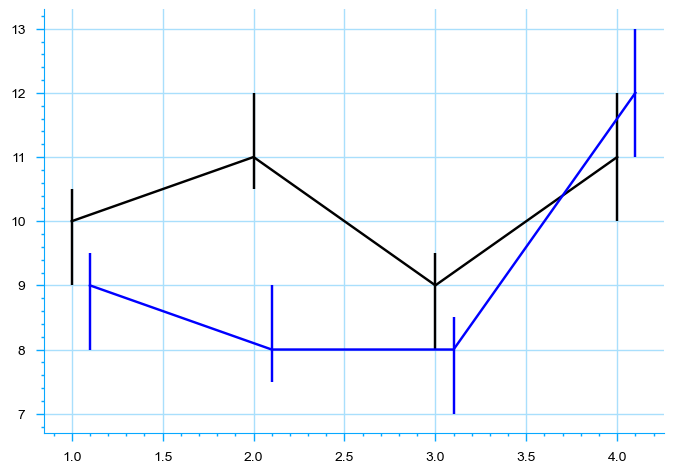

In [49]:
x = np.array((1,2,3,4))
y = np.array((10, 11, 9, 11))
y2 = np.array((9, 8, 8, 12))
yerr = np.array(((1,0.5,1,1),(0.5,1,0.5,1)))

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr, c="black")
ax.errorbar(x+0.1, y2, yerr, c="blue")
